# Neural Network Engine

We are going to explore the following topics in these notebooks:
-Our implementation of the Neural Network and how it works.
-Test it´s functionality with several datasets.
-Discuss the results given by the class.

## Creation of an instance

The source code is in the nn_class.py file.
It can create as many layers and neurons as wanted.

In [1]:
import numpy as np
from neural_network import train, predict
from nn_components.draw_nn import draw_nn
from nn_components.network_layer import FullyConnectedLayer
from nn_components.activations_functions import Relu, Tanh
from nn_components.loss_functions import mse, mse_derivative
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))


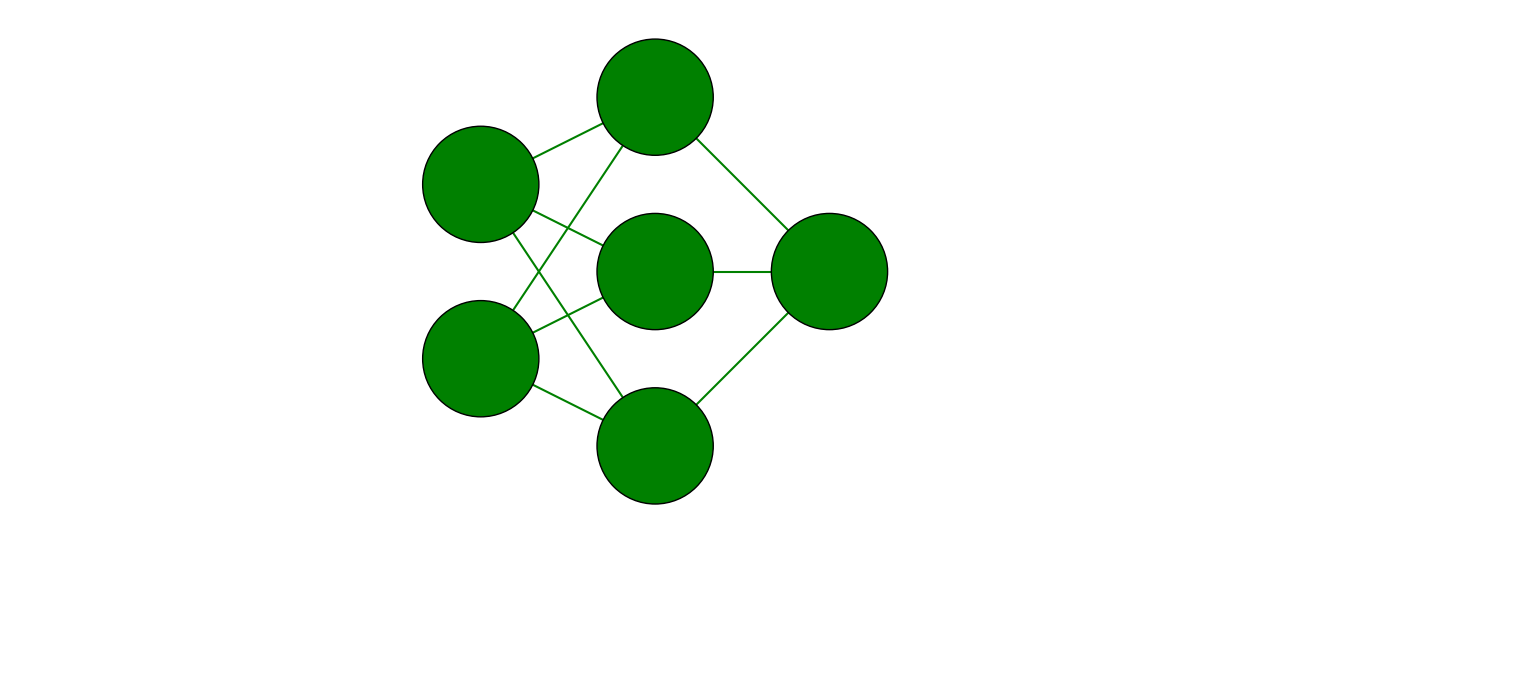

In [2]:
nn = [
    FullyConnectedLayer(2, 3),
    Tanh(),
    FullyConnectedLayer(3, 1),
    Tanh()
]

draw_nn(nn)


Epoch: 0, Error: 0.5383933488625843
Epoch: 1, Error: 0.4307293314713484
Epoch: 2, Error: 0.4121249774441144
Epoch: 3, Error: 0.39603651314031074
Epoch: 4, Error: 0.38129022964493275
Epoch: 5, Error: 0.3689041585680195
Epoch: 6, Error: 0.3595665838543292
Epoch: 7, Error: 0.35280019816407704
Epoch: 8, Error: 0.3476748122417665
Epoch: 9, Error: 0.3436446801158001
Epoch: 10, Error: 0.34051507669224607
Epoch: 11, Error: 0.3381466492667313
Epoch: 12, Error: 0.3363633729596192
Epoch: 13, Error: 0.3349828216461157
Epoch: 14, Error: 0.3338499315066913
Epoch: 15, Error: 0.33284813357190357
Epoch: 16, Error: 0.3318962979507354
Epoch: 17, Error: 0.33094085654504246
Epoch: 18, Error: 0.32994781236160947
Epoch: 19, Error: 0.32889625217188506
Epoch: 20, Error: 0.32777358663337636
Epoch: 21, Error: 0.326572259132927
Epoch: 22, Error: 0.3252875697144969
Epoch: 23, Error: 0.32391630247666653
Epoch: 24, Error: 0.32245591953269154
Epoch: 25, Error: 0.32090415431249975
Epoch: 26, Error: 0.3192588910085112


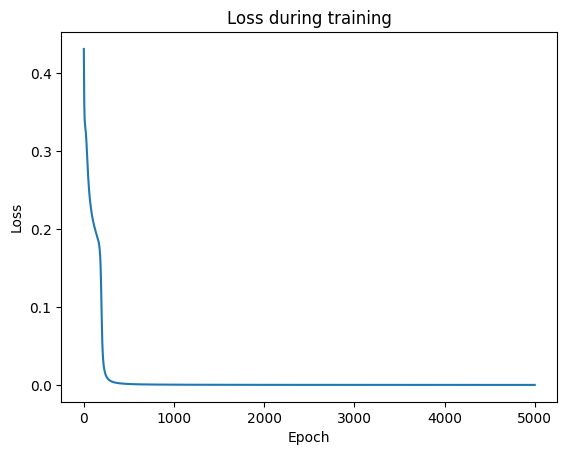

Pred: [[0.00013278]], Actual: [[0]]
Pred: [[0.99300028]], Actual: [[1]]
Pred: [[0.9885847]], Actual: [[1]]
Pred: [[-5.95605471e-05]], Actual: [[0]]


In [3]:
train(nn, mse, mse_derivative, X, y, epochs=5000, learning_rate=0.1, optim='sgd')

for X, y in zip(X, y):
    output = predict(nn, X)
    print(f'Pred: {output}, Actual: {y}')

In [36]:
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = np.reshape(X_train, (15480, 8, 1))
X_test = np.reshape(X_test, (5160, 8, 1))
y_train = np.reshape(y_train, (15480, 1))
y_test = np.reshape(y_test, (5160, 1))

nn = [
    FullyConnectedLayer(8, 64),
    Relu(),
    FullyConnectedLayer(64, 32),
    Relu(),
    FullyConnectedLayer(32, 16),
    Relu(),
    FullyConnectedLayer(16, 8),
    Relu(),
    FullyConnectedLayer(8, 1)
]

train(nn, mse, mse_derivative, X_train, y_train, epochs=100, learning_rate=0.01, optim='adam')

for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    print(f'Pred: {output}, Actual: {y}')

Epoch: 0, Error: 4.246055657536916e+18
Epoch: 1, Error: 8216416.978469564
Epoch: 2, Error: 8071943.587248525
Epoch: 3, Error: 7880985.486821227
Epoch: 4, Error: 7714328.911702604
Epoch: 5, Error: 7562000.794718711
Epoch: 6, Error: 7419051.600330184
Epoch: 7, Error: 7282628.541802931
Epoch: 8, Error: 7150919.794156391
Epoch: 9, Error: 7022697.636993499
Epoch: 10, Error: 6897091.176260949
Epoch: 11, Error: 6773461.699648108
Epoch: 12, Error: 6651329.1718576085
Epoch: 13, Error: 6530326.369165373
Epoch: 14, Error: 6410168.930675559
Epoch: 15, Error: 6290635.055768
Epoch: 16, Error: 6171551.298675269
Epoch: 17, Error: 6052782.3553913105
Epoch: 18, Error: 5934223.544590285
Epoch: 19, Error: 5815795.154370947
Epoch: 20, Error: 5697438.111004744
Epoch: 21, Error: 5579110.603448233
Epoch: 22, Error: 5460785.411432824
Epoch: 23, Error: 5342447.760024527
Epoch: 24, Error: 5224093.574067512
Epoch: 25, Error: 5105728.04059715
Epoch: 26, Error: 4987364.4115195265
Epoch: 27, Error: 4869022.99603861


KeyboardInterrupt: 

Epoch: 0, Error: 44.940085936507465
Epoch: 1, Error: 17.16224878874136
Epoch: 2, Error: 15.962554453267364
Epoch: 3, Error: 14.372319249013037
Epoch: 4, Error: 13.87293338221707
Epoch: 5, Error: 14.884829282363707
Epoch: 6, Error: 13.435091364342977
Epoch: 7, Error: 13.582173090955862
Epoch: 8, Error: 13.114647052871645
Epoch: 9, Error: 13.504679684811725
Epoch: 10, Error: 13.39538486819771
Epoch: 11, Error: 12.914450394062522
Epoch: 12, Error: 13.57387910993124
Epoch: 13, Error: 12.934188252528388
Epoch: 14, Error: 12.809621203780434
Epoch: 15, Error: 12.927072154590885
Epoch: 16, Error: 12.425395095049947
Epoch: 17, Error: 12.303249019944866
Epoch: 18, Error: 12.7077147916295
Epoch: 19, Error: 12.15605904063601
Epoch: 20, Error: 11.491812352116835
Epoch: 21, Error: 12.000228048256764
Epoch: 22, Error: 11.299963946003176
Epoch: 23, Error: 11.39977496888237
Epoch: 24, Error: 11.716140271656284
Epoch: 25, Error: 11.306908561777584
Epoch: 26, Error: 12.00152433989135
Epoch: 27, Error: 12

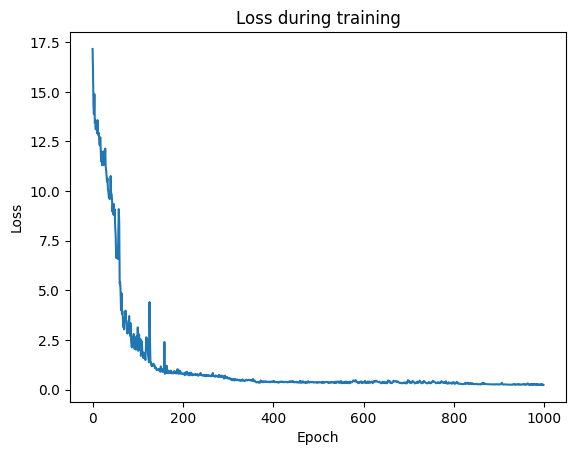

Pred: [[27.24745707]], Actual: [26.94435556]
Pred: [[11.6765977]], Actual: [11.48370202]
Pred: [[22.30894841]], Actual: [21.51989654]
Pred: [[15.76387193]], Actual: [15.87879977]
Pred: [[19.94090071]], Actual: [19.68994229]
Pred: [[19.85398405]], Actual: [19.36634576]
Pred: [[17.73501509]], Actual: [17.90866625]
Pred: [[21.17525012]], Actual: [20.55063673]
Pred: [[13.75556422]], Actual: [13.6297059]
Pred: [[7.99114321]], Actual: [8.04925355]
Pred: [[14.14052988]], Actual: [14.75102254]
Pred: [[8.12315663]], Actual: [8.69840292]
Pred: [[17.96514899]], Actual: [17.60120599]
Pred: [[9.68923334]], Actual: [10.31173782]
Pred: [[16.29660894]], Actual: [15.64701379]
Pred: [[17.77169523]], Actual: [18.05085997]
Pred: [[23.80276844]], Actual: [22.53764191]
Pred: [[19.93734018]], Actual: [19.47908461]
Pred: [[15.3452637]], Actual: [15.63144925]
Pred: [[20.83915057]], Actual: [19.82600444]
Pred: [[21.63715989]], Actual: [20.93016756]
Pred: [[10.40656784]], Actual: [10.42995715]
Pred: [[8.17273614

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

n_points = 1000
n_dimensions = 6
noise_level = 0.25

np.random.seed(42)
X = np.random.rand(n_points, n_dimensions) * 10
coefficients = np.random.rand(n_dimensions)
Y = X.dot(coefficients)

Y_noisy = Y + noise_level * np.random.randn(n_points)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_noisy, test_size=0.2, random_state=42)


X_train = np.reshape(X_train, (800, 6, 1))
X_test = np.reshape(X_test, (200, 6, 1))
Y_train = np.reshape(Y_train, (800, 1))
Y_test = np.reshape(Y_test, (200, 1))

nn = [
    FullyConnectedLayer(6, 10),
    Tanh(),
    FullyConnectedLayer(10, 3),
    Tanh(),
    FullyConnectedLayer(3, 1)
]

train(nn, mse, mse_derivative, X_train, Y_train, epochs=1000, learning_rate=0.0008, optim='sgd')

for X, y in zip(X_test, Y_test):
    output = predict(nn, X)
    print(f'Pred: {output}, Actual: {y}')
